In [1]:
from IPython.display import Image
from IPython.display import display
import os
try:
    __IPYTHON__
    from tqdm.notebook import tqdm
except NameError:
    from tqdm import tqdm
import torch

In [ ]:
!conda install -n TCSfromDMRS -c conda-forge jupyterlab_widgets
!conda install -n TCSfromDMRS -c conda-forge ipywidgets

In [ ]:
ww1212tar_dir = "1212"
targ_export_dir = "exports"
targ_data_dir = "data/29092022"
erg_dir = "erg"
# untar the export files to exports, e.g. 1212/export0.tar to exports/export0

# Preprocessing

## Extract exports

In [ ]:
# untar the export files to exports, e.g. 1212/export0.tar to exports/export0
# extract_exports.main(ww1212tar_dir, targ_export_dir)
!python extract_exports.py --ww1212_dir 1212 --targ_export_dir exports

## Save DMRS to json

In [ ]:
# 03092022 # run again for full statistics
# warnings.filterwarnings("ignore")
# args ='--targ_export_dir {} --targ_data_dir {} --erg_dir {} --save_deriv {} --sample_only {} --verbose {}'.format(
#     targ_export_dir, targ_data_dir, erg_dir, "no", "no", "no")
# !python src/preprocess.py {args} >& preprocess_log.txt &
!python preprocess.py --targ_export_dir exports --targ_data_dir data/29092022 --erg_dir erg --save_deriv no --sample_only no --verbose no


## Generate Transform Config

In [49]:
# logic_pred_anno_path = "erg/logical_preds.txt"
# trsfm_config_path = "transform/configs/config_12092022.json"
# args ='--logic_pred_anno_path {} --trsfm_config_path {}'.format(
#     logic_pred_anno_path, trsfm_config_path
# )
# !python generate_trsfm_config.py {args}
!python generate_trsfm_config.py --logic_pred_anno_path erg/logical_preds.txt --trsfm_config_path transform/configs/config.json

## Generate Dummy Data

In [5]:
!python generate_dummy_data.py

NOTE: parsed 1 / 1 sentences, avg 4083k, time 0.04050s
dmrs drawn: ./data/dummy_data/figures/dmrs_0.png
['./data/dummy_data/figures/dmrs_0.png']


## Generate Training Configs

In [4]:
!python generate_train_configs.py -c configs/

Generating sample config ...
Generating dummy config ...
Generating training configs ...


## Try preparing training info on Dummy Data

In [6]:
!python prepare_train.py -c configs/config_dummy.json -t yes

{'discarded': True, 'discarded_reason': 'too few pred func node/content preds', 'node2pred': {0: 'udef_q', 1: '_lion_n_1', 2: '_be_v_id', 3: 'udef_q', 4: 'udef_q', 5: '_cat_n_1', 6: 'udef_q', 7: 'implicit_conj', 8: 'udef_q', 9: '_animal_n_1', 10: '_and_c', 11: 'udef_q', 12: '_mammal_n_1'}, 'pred_func_nodes': [1], 'content_preds': ['_mammal_n_1', '_animal_n_1', '_cat_n_1', '_lion_n_1'], 'logic_expr': ['full-aANDb', {'pf': '_lion_n_1@ARG0', 'args': [1]}, ['X-aANDb', {'pf': '_cat_n_1@ARG0', 'args': [1]}, ['X-aANDb', {'pf': '_animal_n_1@ARG0', 'args': [1]}, {'pf': '_mammal_n_1@ARG0', 'args': [1]}]]], 'pred_func_used': ['_animal_n_1@ARG0', '_mammal_n_1@ARG0', '_cat_n_1@ARG0', '_lion_n_1@ARG0']}
Lions are cats, animals and mammals
logic expression tree drawn: data/dummy_data/figures/logic_expr_0.png
dmrs drawn: data/dummy_data/figures/dmrs_0.png
Pool ended. Reducing ...
saving pred2ix of 0 predicates ...
prepared transformed data info saved at: data/dummy_data/transformed/TCS_dummy/info
retr

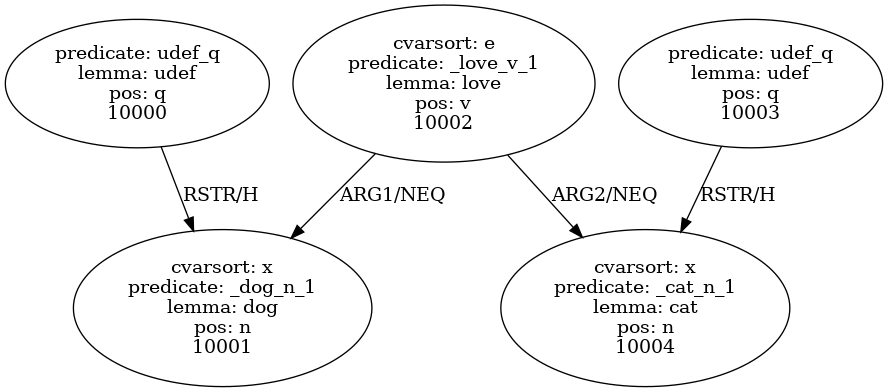

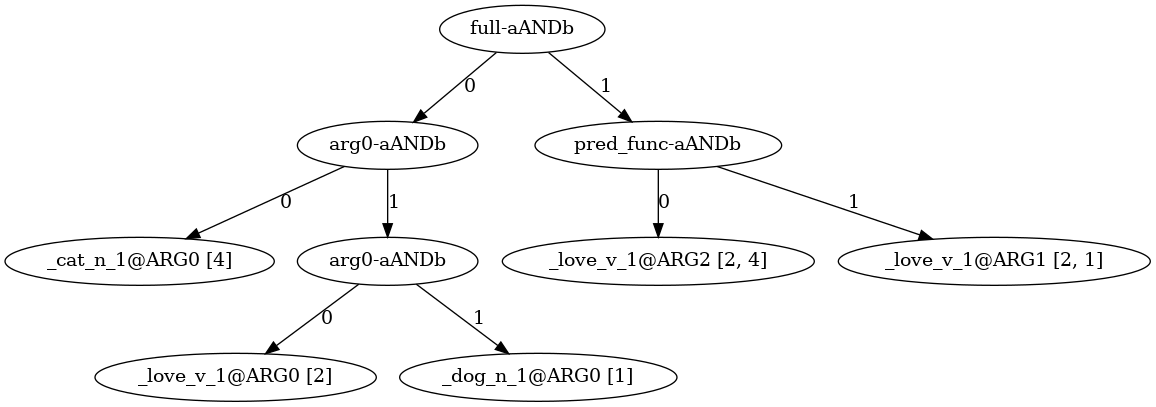

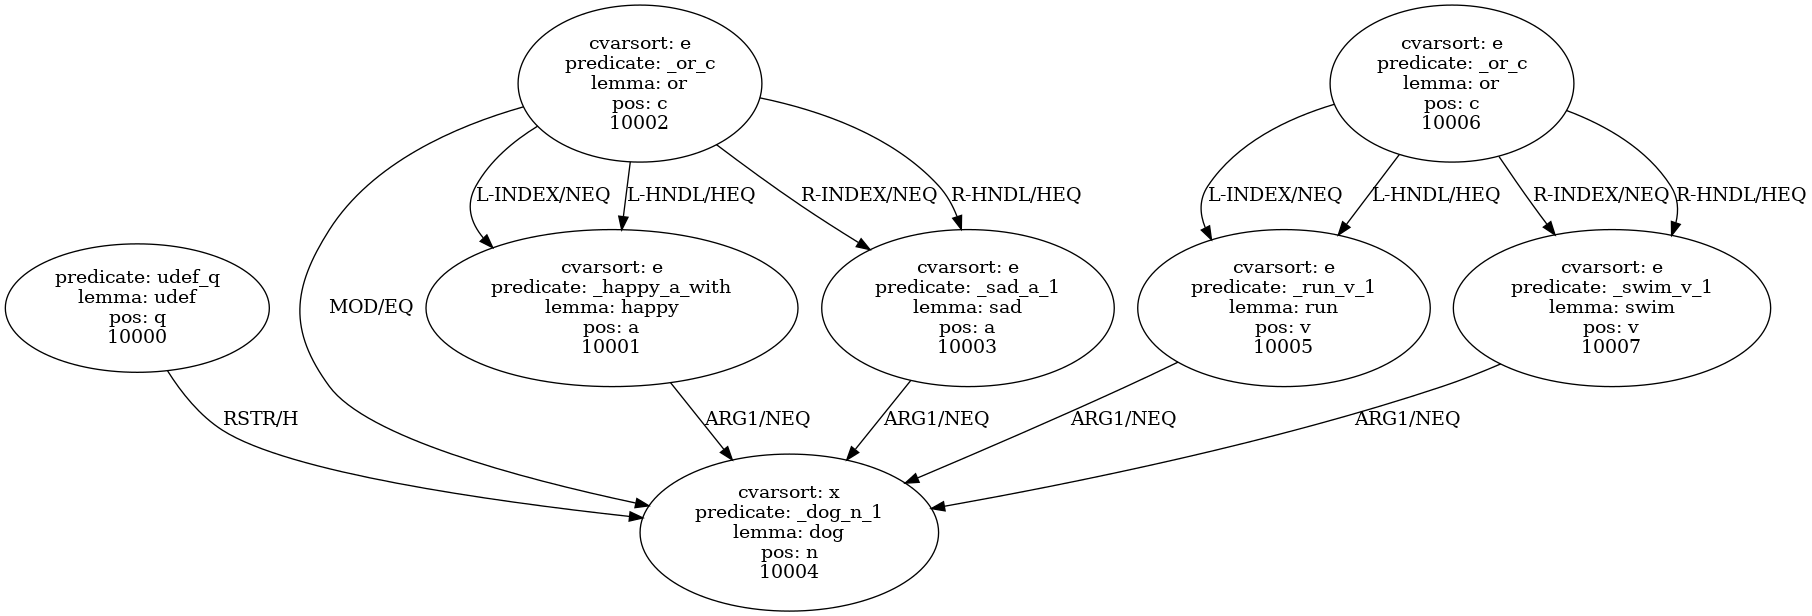

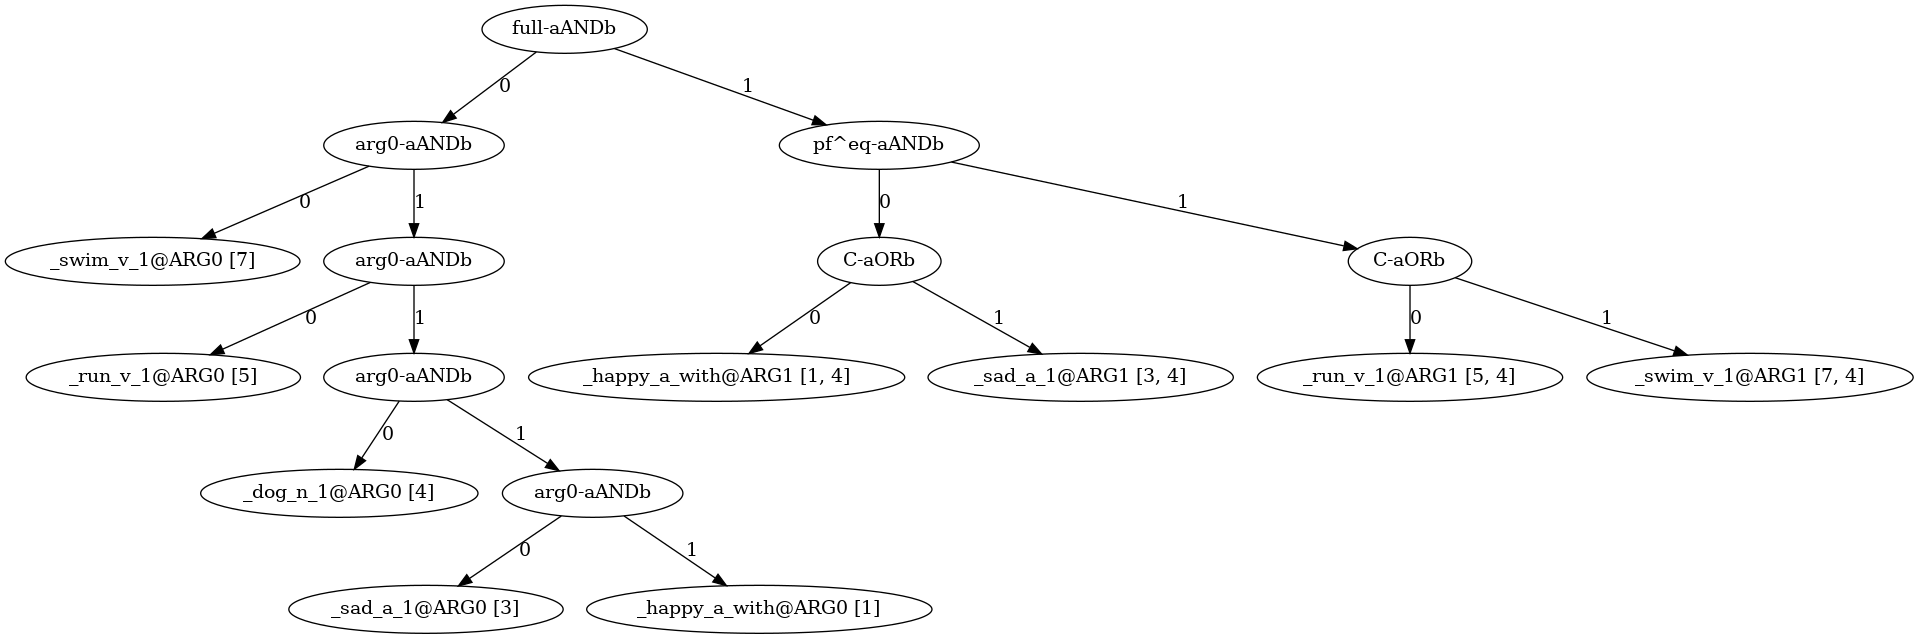

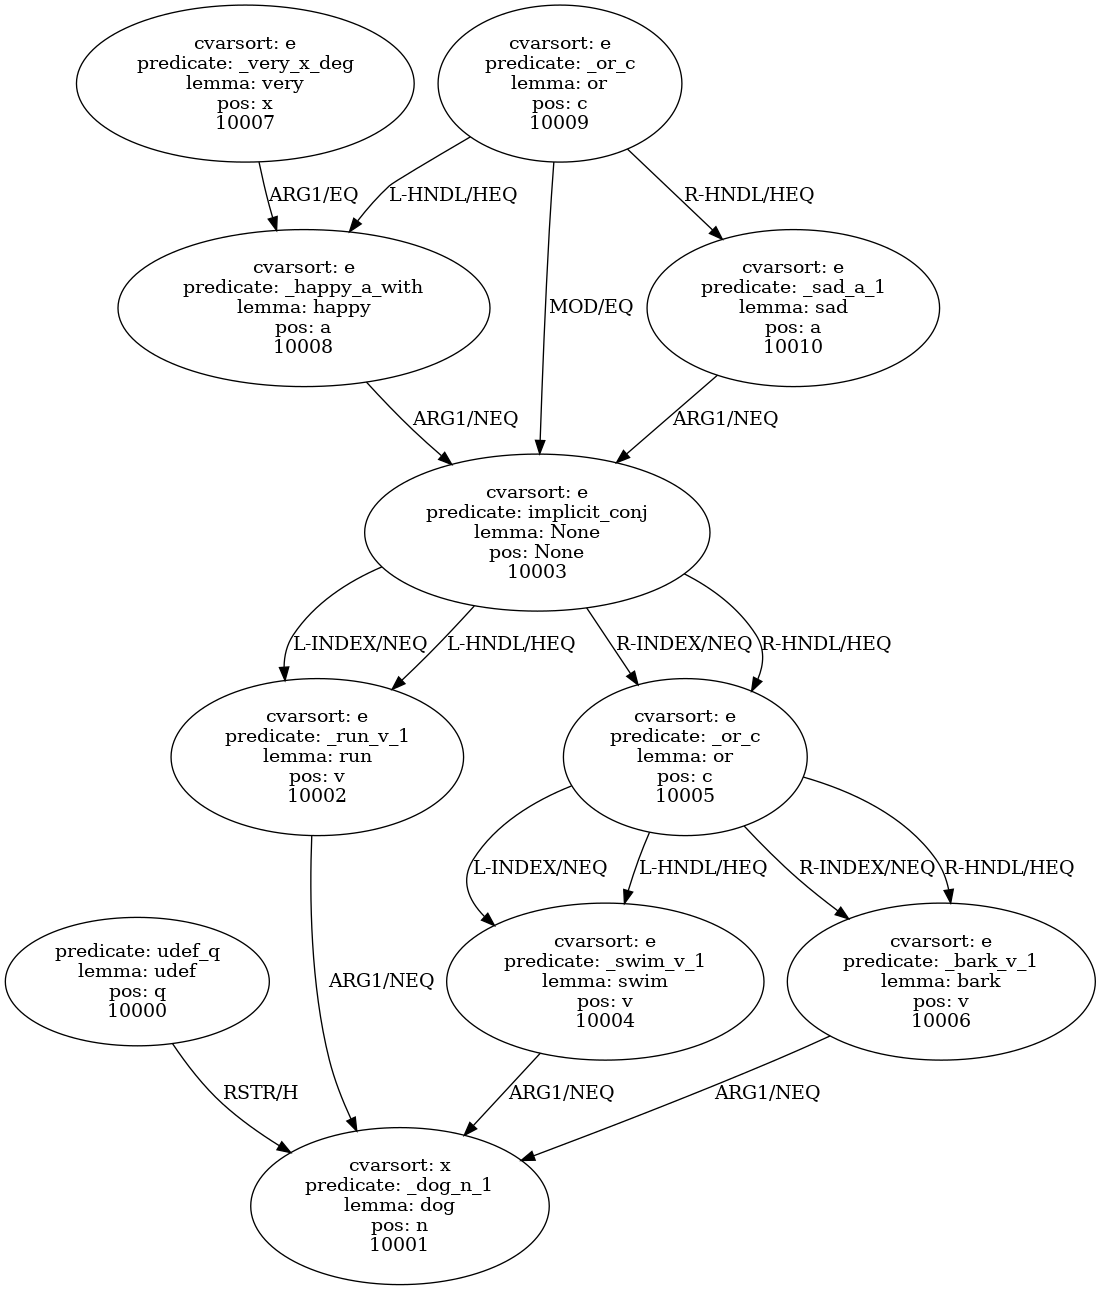

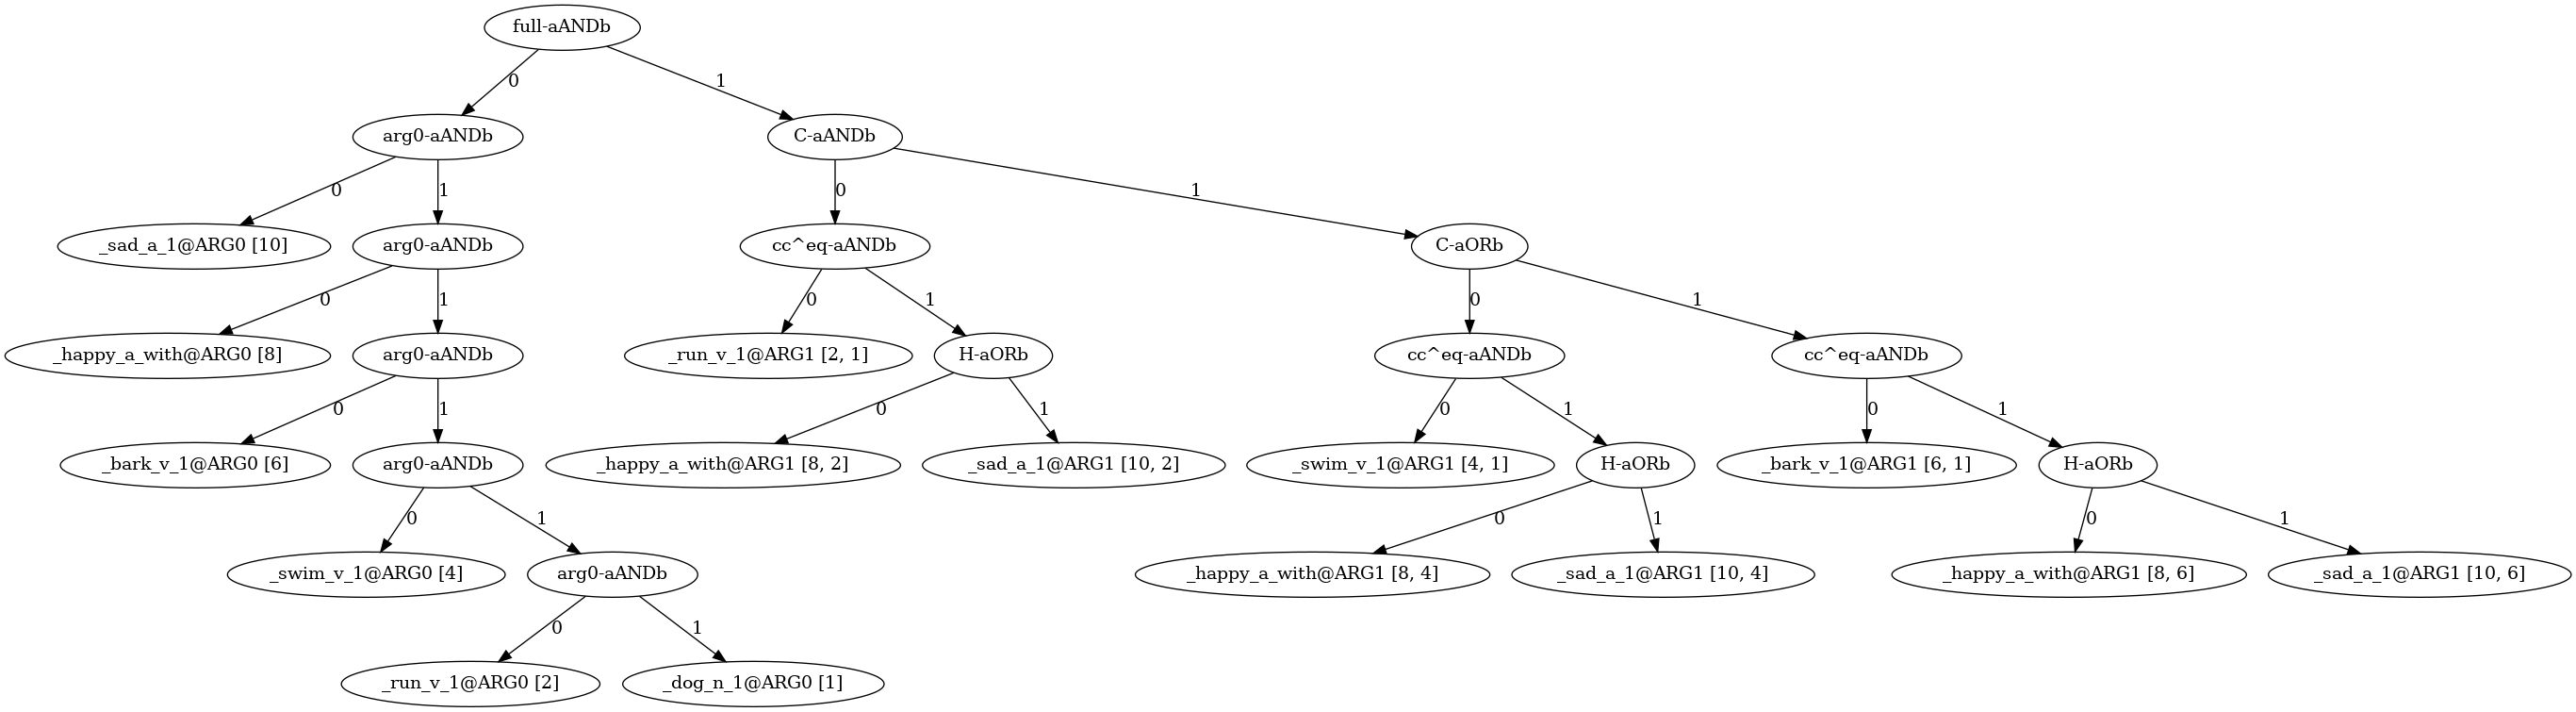

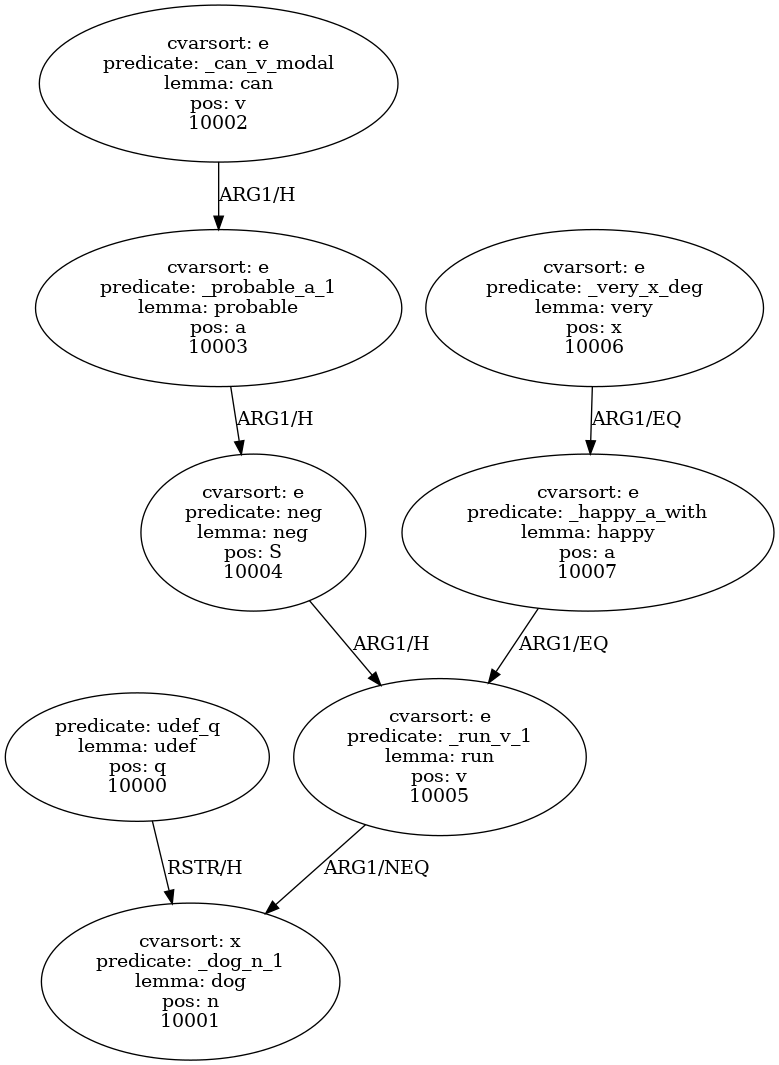

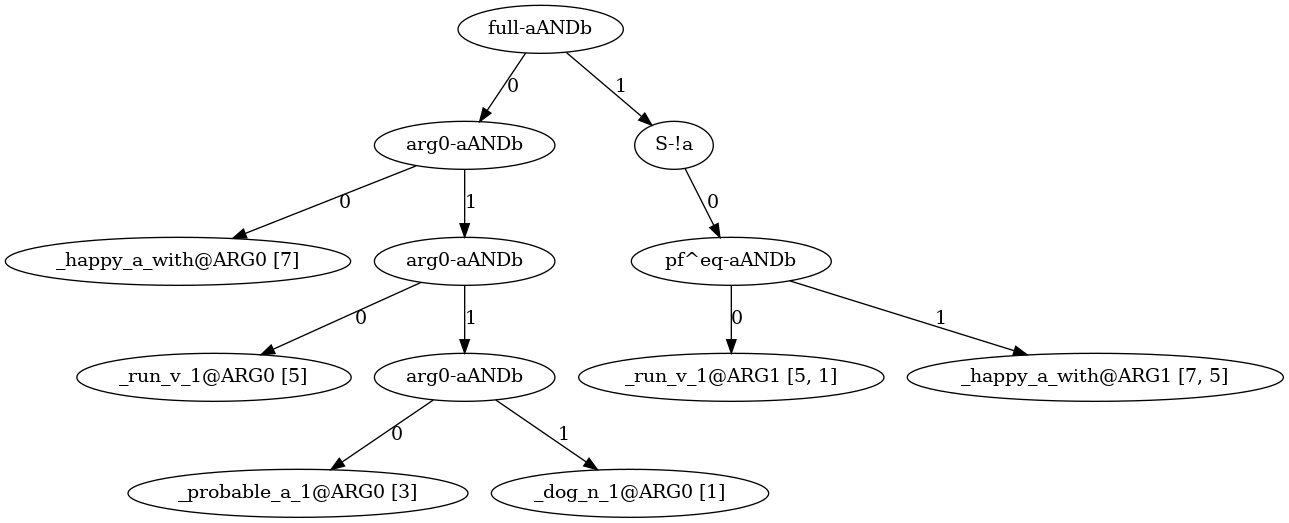

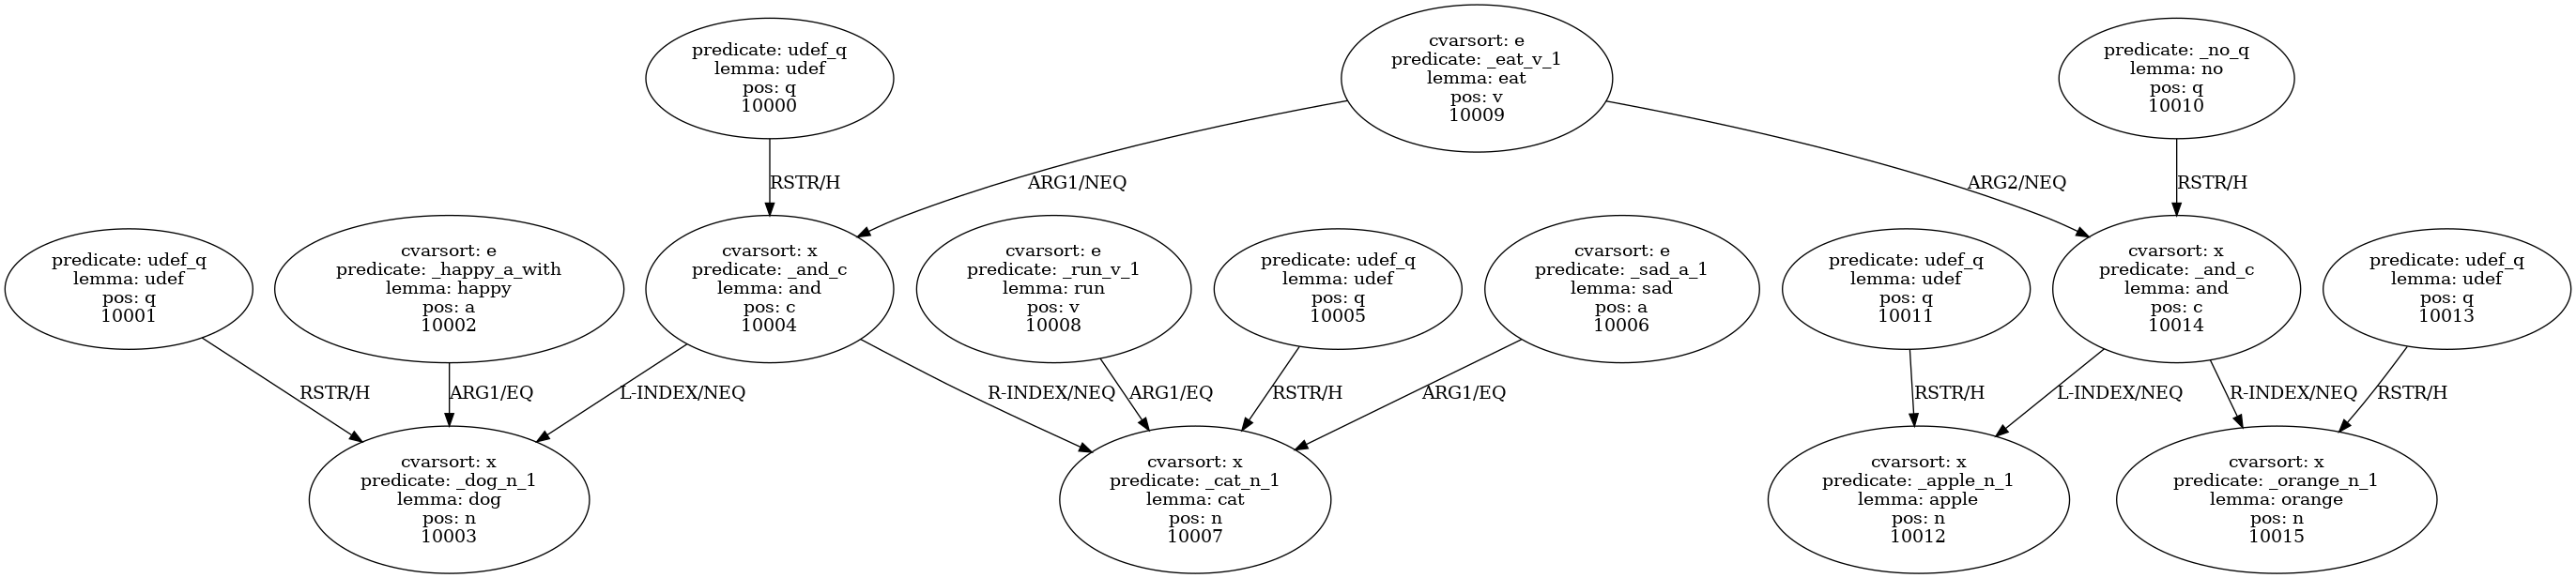

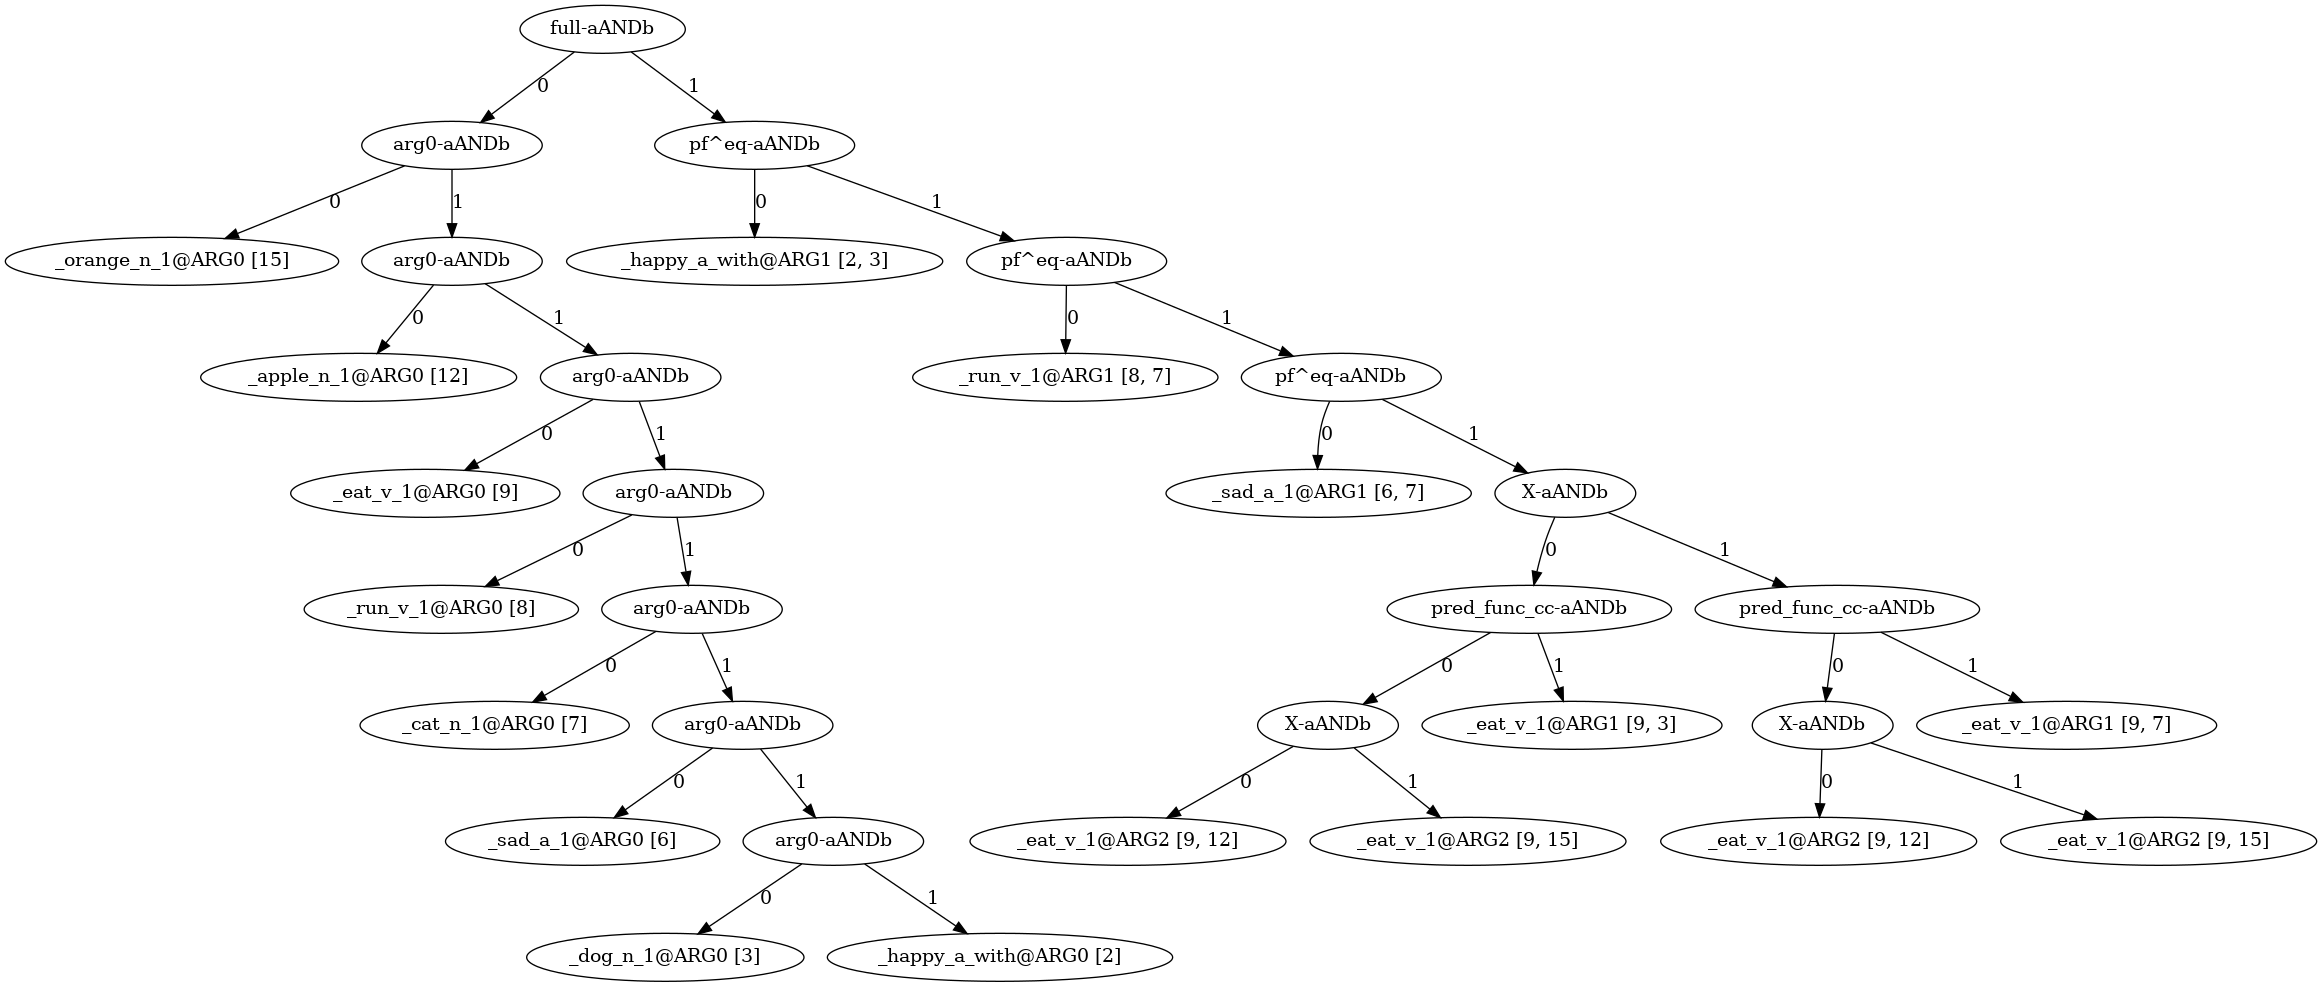

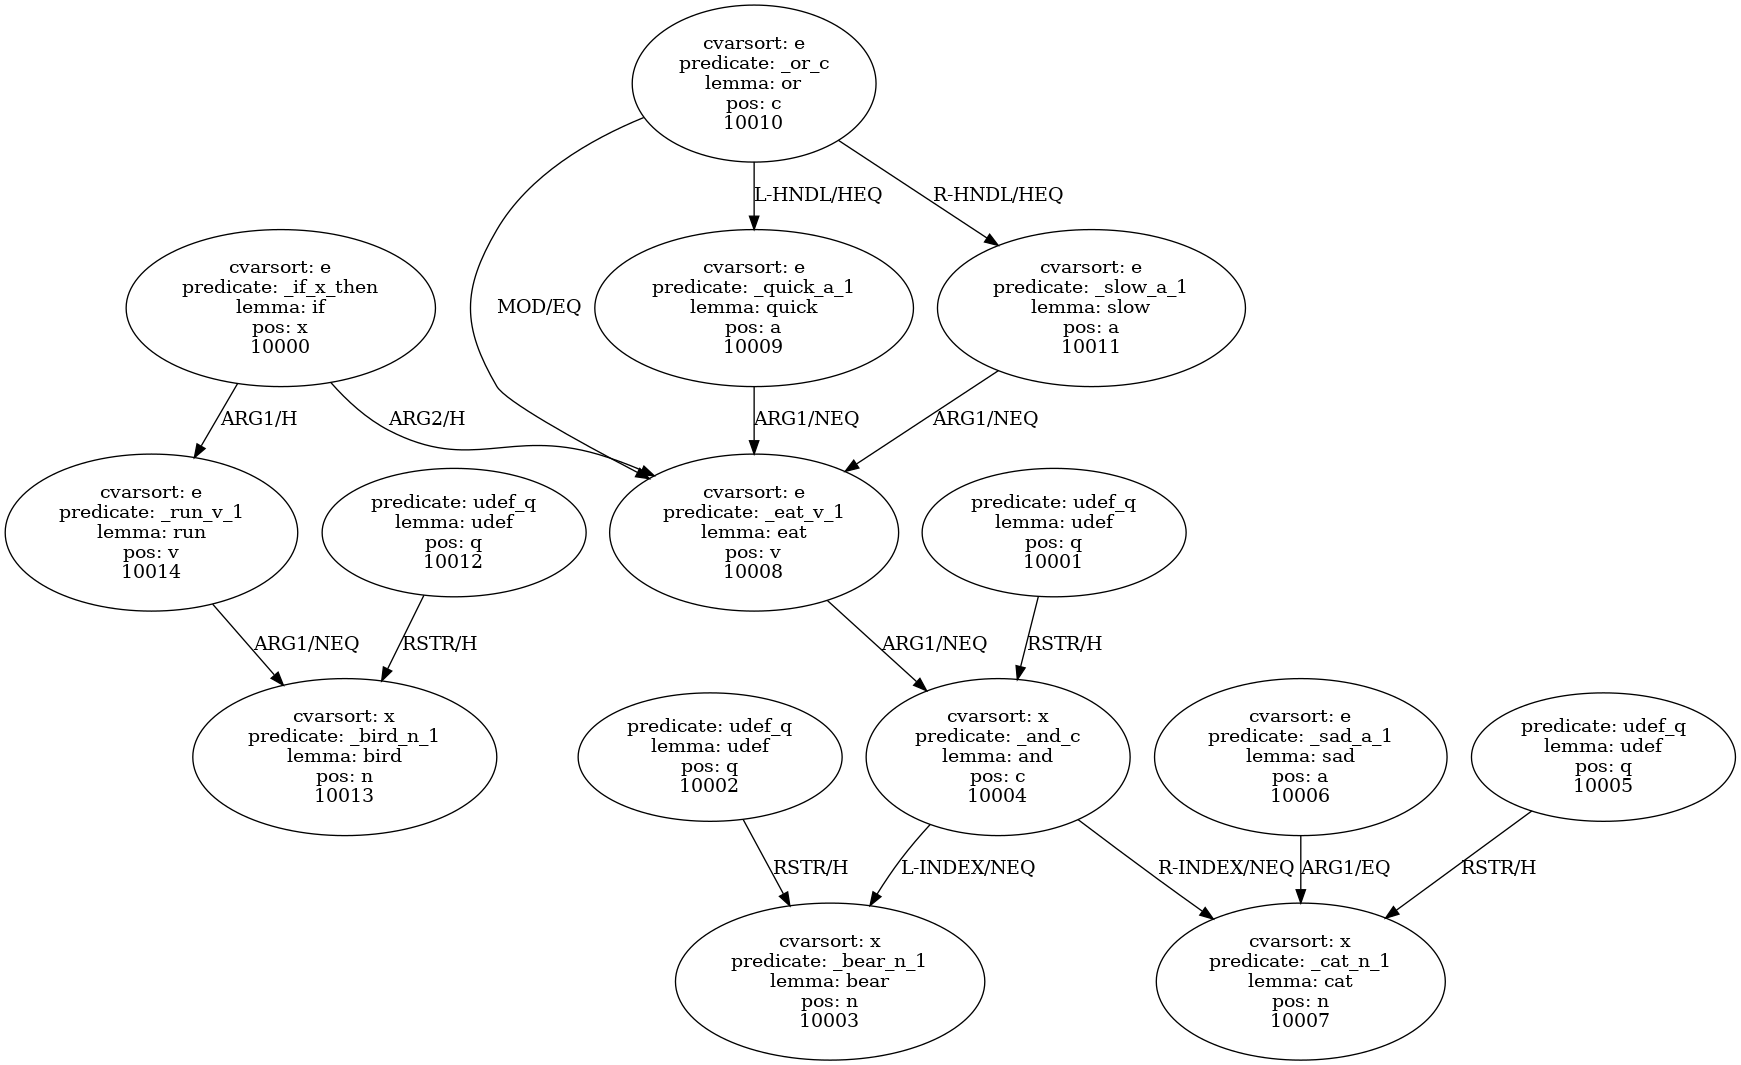

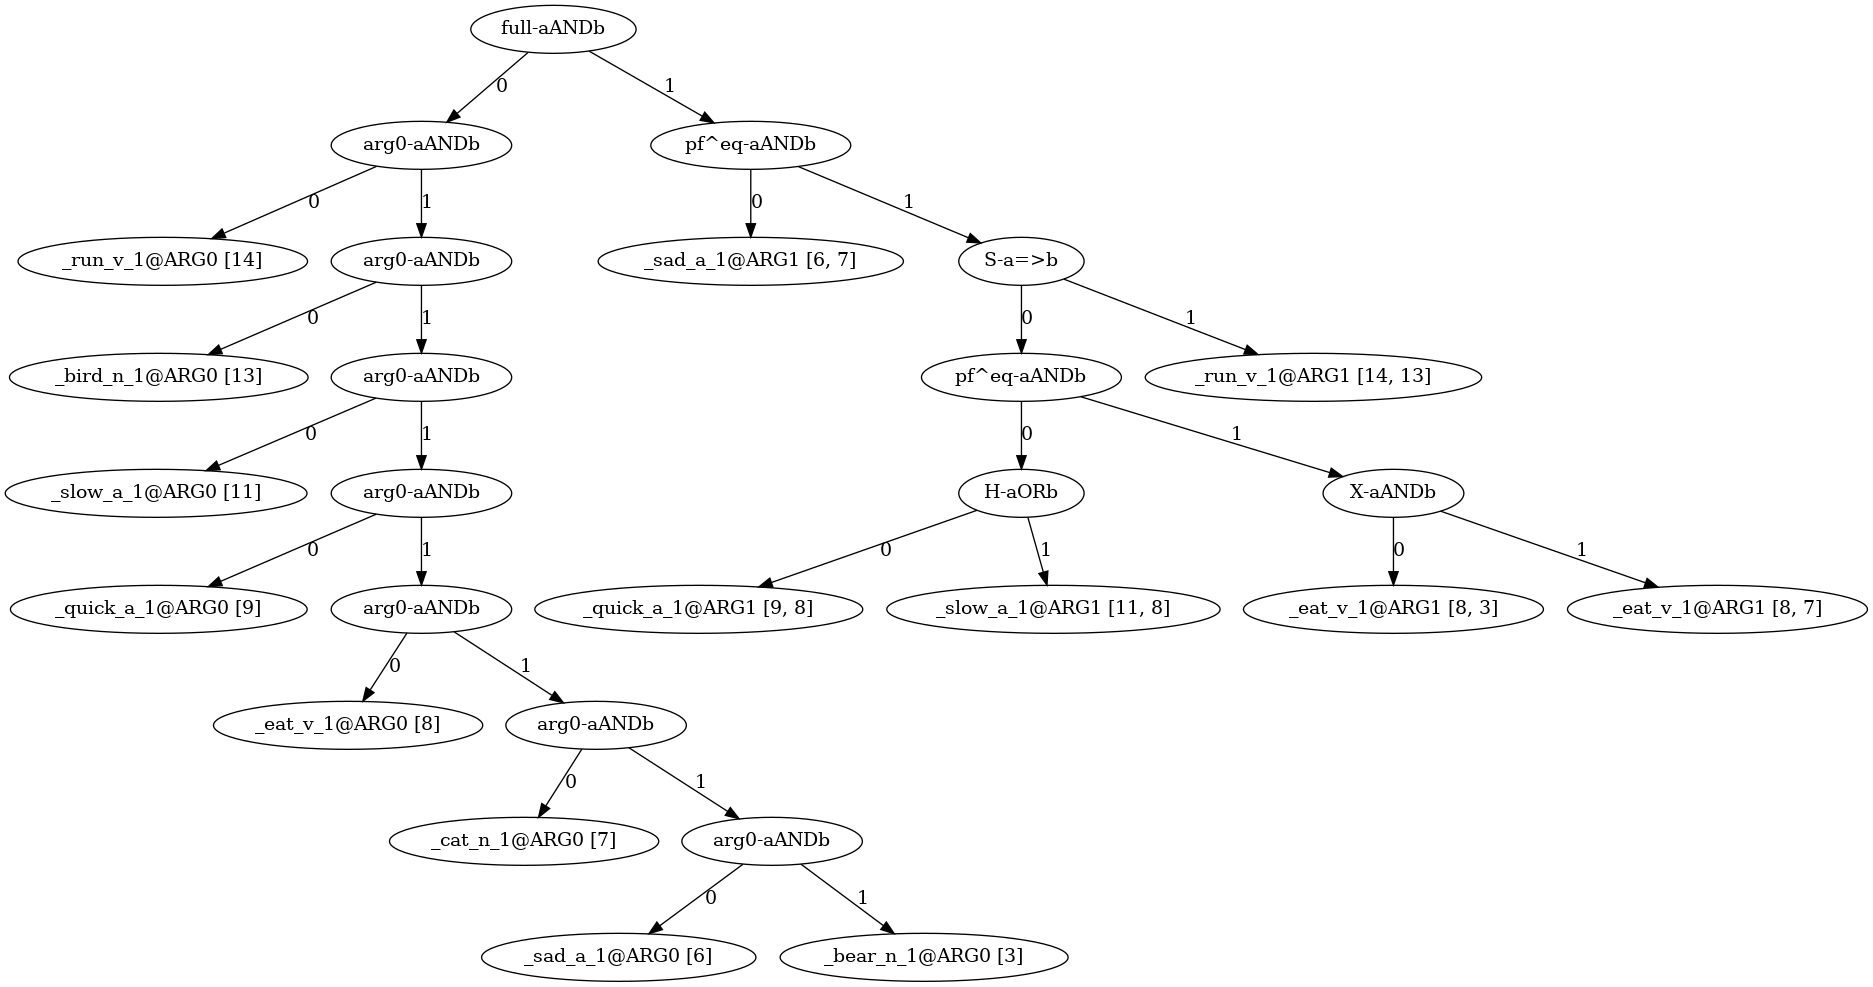

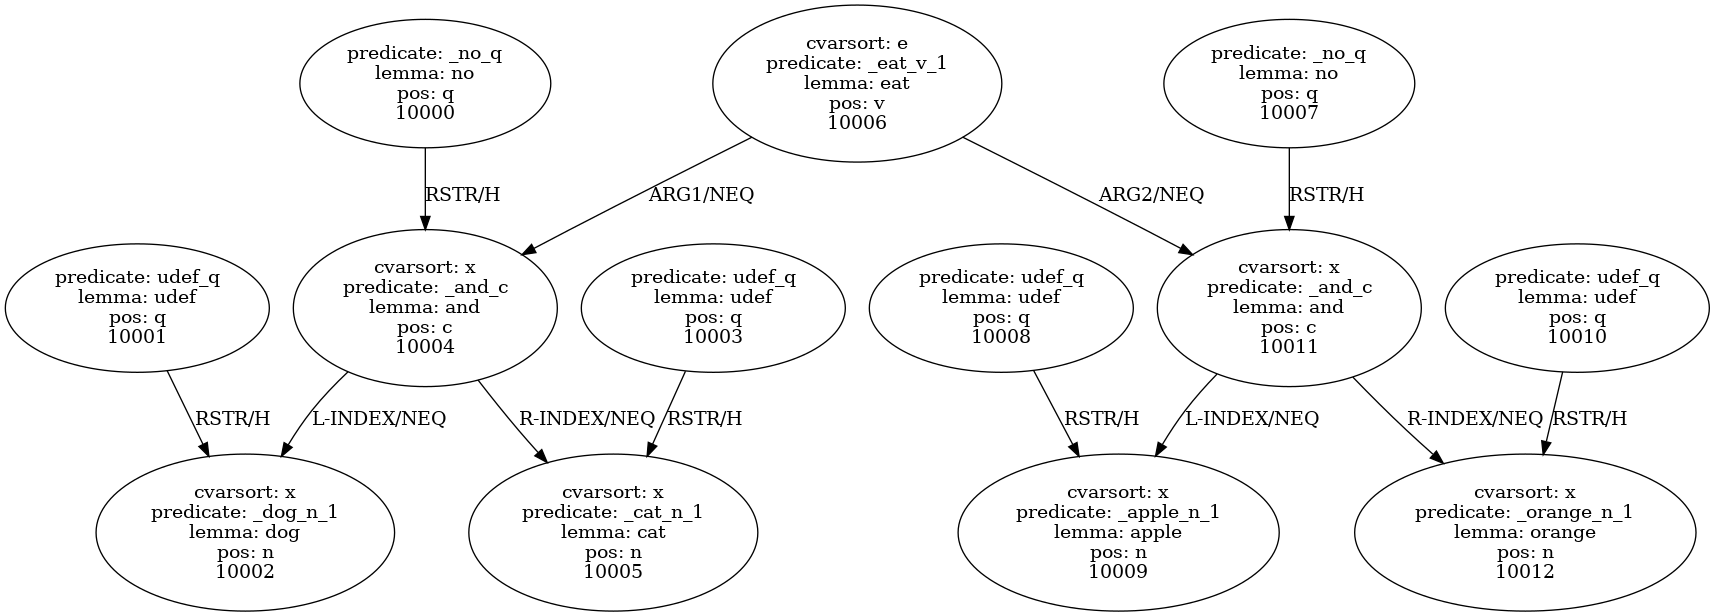

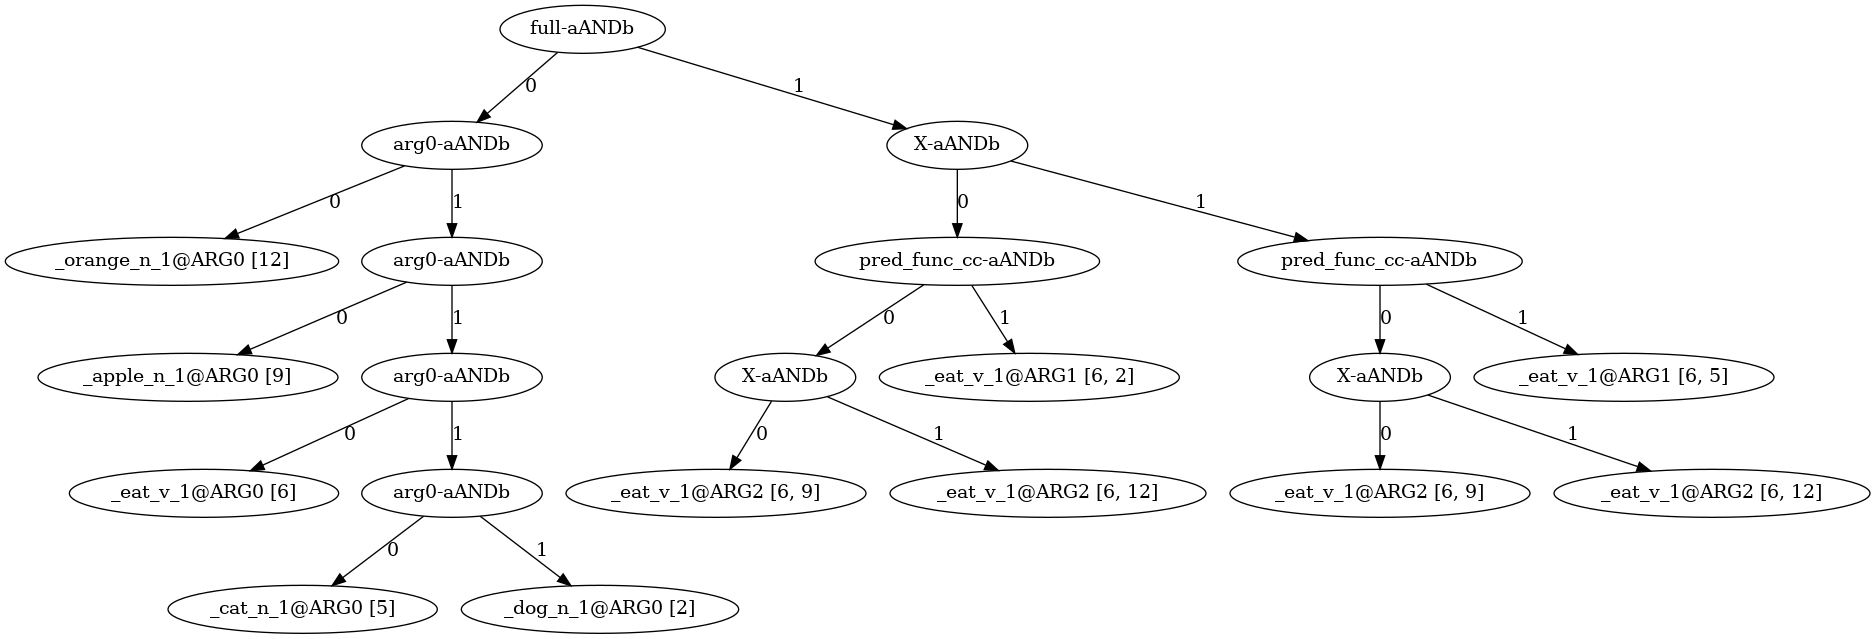

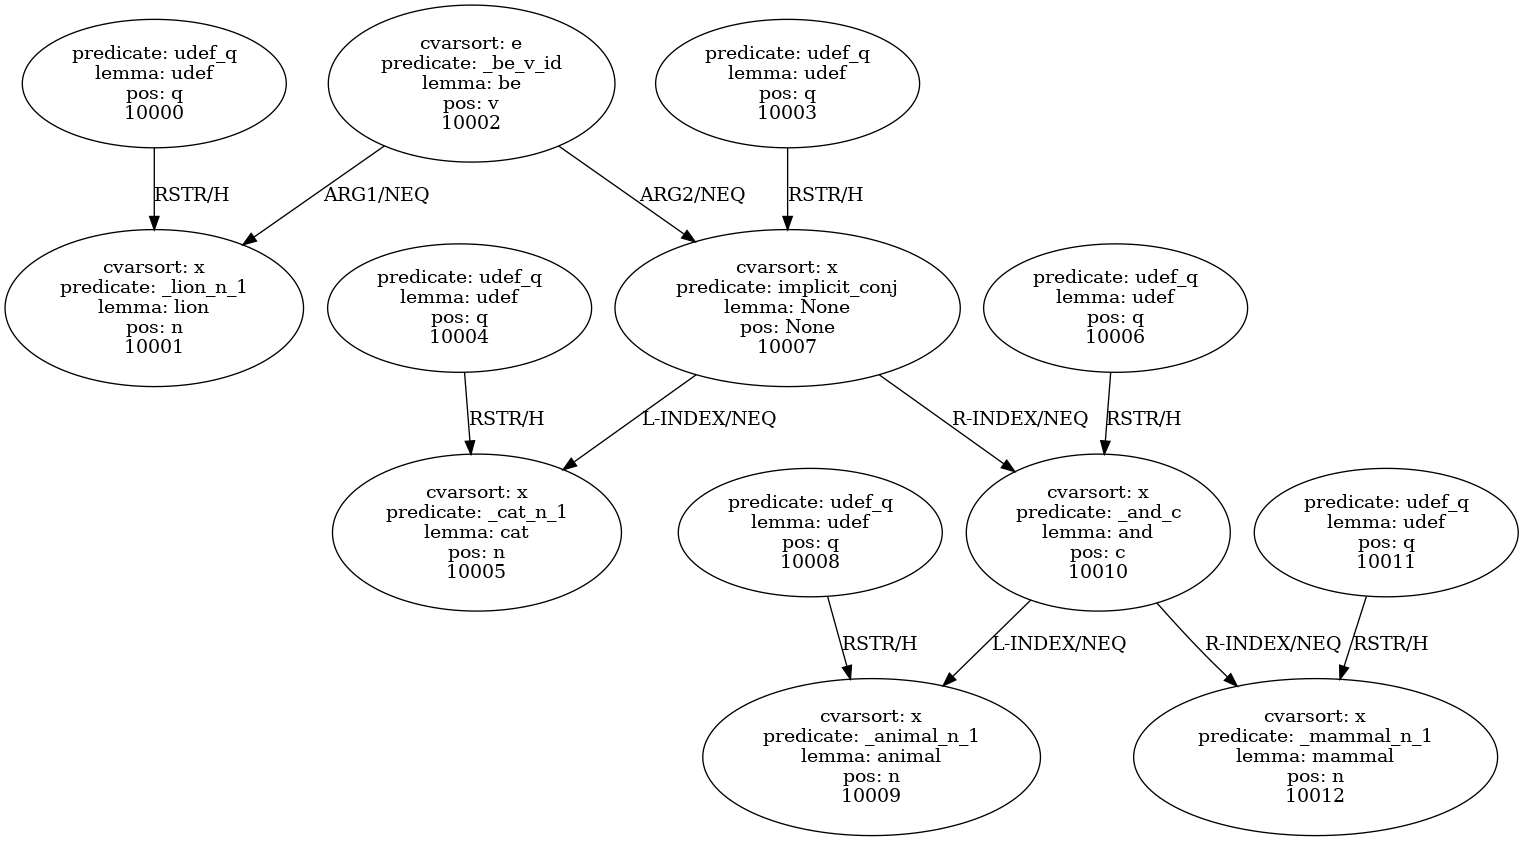

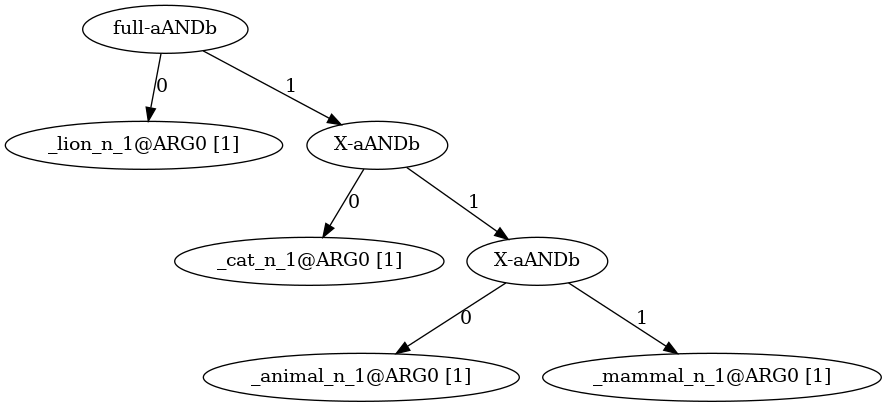

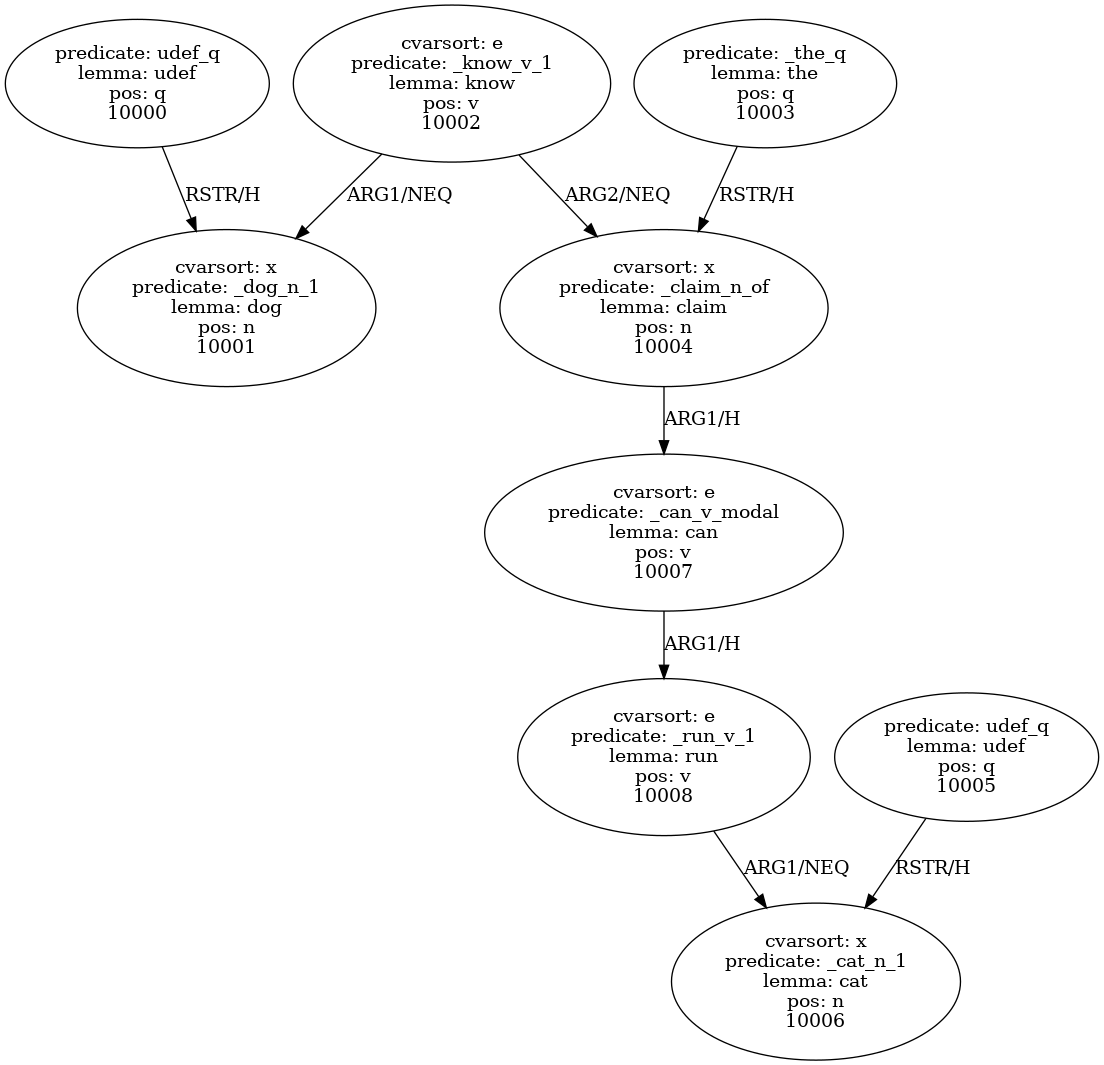

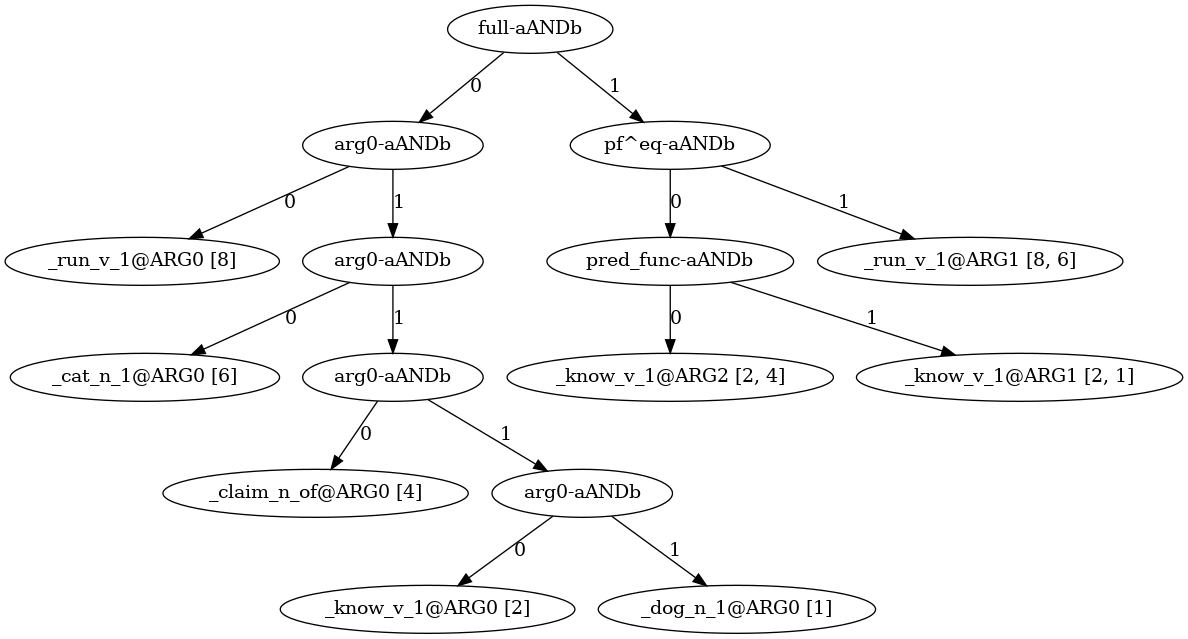

In [4]:
no_dummy_dmrs = 9 #29

dmrs_save_paths = ['./data/dummy_data/figures/dmrs_{}.png'.format(i) for i in range(no_dummy_dmrs)]
logic_expr_save_paths = ['./data/dummy_data/figures/logic_expr_{}.png'.format(i) for i in range(no_dummy_dmrs)]

images = []

for i in range(no_dummy_dmrs):
    images.append(Image(filename=dmrs_save_paths[i]))
    images.append(Image(filename=logic_expr_save_paths[i]))

display(*images)



In [3]:
# examine sample prepared instance
!python prepare_train.py --config configs/config_f0-n32-d50-lgF_sample.json --draw_tree no --print_pred_func yes

Pool ended. Reducing ...
saving pred2ix of 12182 predicates ...
prepared transformed data info saved at: data/27092022/transformed/TCS_f0_lgF_sample/info
retransforming the data given the min. freq. ...
[[('_correct_a_1@ARG1', ['_correct_a_1', '_title_n_of']),
  ('_title_n_of@ARG1', ['_title_n_of', '_article_n_of'])],
 ['_title_n_of', '_correct_a_1', '_article_n_of']]

[[('_omit_v_1@ARG2', ['_omit_v_1', '_character_n_1']),
  ('_technical_a_1@ARG1', ['_technical_a_1', '_limitation_n_1']),
  ('_feature_v_cause@ARG2', ['_feature_v_cause', '_character_n_1']),
  ('_substitute_v_1@ARG2', ['_substitute_v_1', '_character_n_1'])],
 ['_character_n_1',
  '_substitute_v_1',
  'u_subscript_n',
  '_technical_a_1',
  '_feature_v_cause',
  'u_superscript_n',
  '_omit_v_1',
  '_limitation_n_1']]

[[('_have_v_1@ARG2', ['_have_v_1', 'u_perihelion_n']),
  ('_far_a_1@ARG1', ['_far_a_1', '_approach_n_to']),
  ('_approach_n_to@ARG1', ['_approach_n_to', '_sun_n_1']),
  ('_close_a_to@ARG1', ['_close_a_to', '_a

## Prepare Evaluation data

In [14]:
!python prepare_eval.py -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json -s eval_data_sets -e eval_data

RELPRON-dev has 65, 518 terms, props
RELPRON-test has 73, 569 terms, props
set()
0
Finally, RELPRON-dev has 65, 518, 33670 terms, props, instances
set()
0
Finally, RELPRON-test has 73, 569, 41537 terms, props, instances
GS2011 iaa_sep: 0.5780741537674307; iaa_avg: 0.7387408696819319
GS2011 has 199 instances
after filtering OOV: GS2011 has 100 SVO instances
GS2013 iaa_sep: 0.5870766233627992; iaa_avg: 0.7773936738225761
GS2013 has 199 instances
after filtering OOV: GS2013 has 100 SVO instances
GS2012 iaa_sep: 0.45860306755529806; iaa_avg: 0.6867682454198015
GS2012 has 194 instances
after filtering OOV: GS2012 has 97 ASVAO instances
Weeds2014 has 1668 instances, 834 of which is positive
animal pheasant 0
beak pheasant 0
bird sparrow 0
beast fox 0
creature fox 0
tail fox 0
good stove 0
appliance stove 0
bookshop stove 0
telephone stove 0
device rifle 0
object rifle 0
barrel rifle 0
alcohol cottage 0
accommodation cottage 0
owner cottage 0
ceiling cottage 0
lodging cottage 0
speaker radio 

## Training

### On Sample Data

In [ ]:
!python prepare_train.py -c configs/config_f0-n2-d64_sample.json -s eval_data_sets -e eval_data

In [ ]:
!python train.py -c configs/config_sample.json

### On All Data

In [2]:
!python prepare_train.py -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json

worker 0: 0.00% done
worker 1: 0.00% done
worker 8: 0.00% done
worker 9: 0.00% done
worker 6: 0.00% done
worker 4: 0.00% done
worker 2: 0.00% done
worker 5: 0.00% done
worker 7: 0.00% done
worker 3: 0.00% done
worker 10: 0.00% done
worker 11: 0.00% done
worker 11: 0.98% done
worker 0: 0.98% done
worker 9: 0.98% done
worker 10: 0.98% done
worker 6: 0.98% done


# Post-training

## Ensembling

In [ ]:
# ensembling by re-running model inference; run also baseline for a significance test
python post_evaluate.py\
    -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json \
    -p saved/models/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed29/checkpoint-epoch4-batch51.pth \
    -p saved/models/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Id-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.01-endBeta0.01at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed30/checkpoint-epoch4-batch61.pth 
    -b eval_data_sets

In [ ]:
# ensembling by reading outputs of models
python post_evaluate.py\
    -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json \
    -o results/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed29/epoch4_10 \
    -o results/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed30/epoch4_1


## Check trained params

In [1]:
!python check_params.py -c configs/config_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT.json -p saved/models/TCS_f100-n32-e300-d300-p0.5-lgF-PAS-Tanh-l20-GenCon-avgF-a0-spT-alphaNone-startBeta0.0-endBeta0.0at1-vT-stdNormF-g128-elr0.001-dlr0.001-sfT-seed29/checkpoint-epoch4-batch0.pth

Initializing encoder ...
Initializing decoder ...
Loading checkpoint: saved/models/TCS_f500-n32-d200-lgF/checkpoint-epoch1-batch64.pth ...
Checkpoint loaded. Resume training from epoch 2
Parameter containing:
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.4766, -1.9169, -0.4910,  ..., -0.1488,  0.3363,  0.1571],
        [ 0.5621, -0.3065, -0.8047,  ...,  1.1954, -0.4608, -1.0324],
        ...,
        [ 0.4916,  0.9901, -0.0930,  ..., -0.9942, -1.6992, -0.3499],
        [-0.2599, -0.7937,  1.4623,  ..., -1.3770,  0.6408,  0.6350],
        [-0.7511, -0.4378,  0.0340,  ..., -0.1553,  0.4888,  0.5617]],
       requires_grad=True)
Parameter containing:
tensor([[-0.0101, -0.0217, -0.0456,  ..., -0.0012, -0.0094,  0.0054],
        [-0.0635, -0.0504, -0.0048,  ..., -0.0031, -0.0124, -0.0026],
        [ 0.1299,  0.0115, -0.0410,  ..., -0.0056, -0.0063,  0.0125],
        ...,
        [ 0.0144,  0.0463,  0.1207,  ..., -0.0050, -0.0103,  0.0008],
        [-0.005

# Misc

In [ ]:
# check raw data
from src import util
from pprint import pprint
import json
snt_ids = ["1000060400020", "1000060700020", "1000060100020", "1000060200020", "1000060300020", "1000060500020"]
snt_ids = ["1000150800040"] #1000140000010
data_dir = "data/27092022"
files = [file for file in os.listdir(data_dir) if all([
    os.path.isfile(os.path.join(data_dir, file)),
    # file.startswith("{}_".format(str(worker_id))),
    util.is_data_json(file)
    ])
]
for file in files:
    with open(os.path.join(data_dir, file)) as f:
        idx2instance = json.load(f)
    snt_ids_copy = snt_ids.copy()
    for snt_id in snt_ids:
        if snt_id in idx2instance:
            pprint (idx2instance[snt_id]['snt'])
            snt_ids_copy.remove(snt_id)
        # for idx, instance in idx2instance.items():
        # # 528 identical sentences
        #     if instance['snt'] == "It features ⌊>superscript>⌋ or ⌊>subscript>⌋ characters that are substituted or omitted because of ⌊>technical limitations>⌋.":
        #         print (instance['id'])
    snt_ids = snt_ids_copy
    if snt_ids == []:
        break


('Its registrars are not only individuals, businesses and organizations in the '
 'Philippines, but also those in other parts of the world.')


In [ ]:
no_dmrs = 30

images = []
fig_dir = "./data/24092022/figures"
ids = set()

for root, dirs, files in os.walk(fig_dir):
    for file in files:
        ids.add(file.split("_")[-1].split(".")[0])
        # file_path = os.path.join(fig_dir, file)
        # images.append(Image(filename=file_path))
ids = sorted(ids)
# display(*images)

dmrs_save_paths= [os.path.join(fig_dir, 'dmrs_{}.png'.format(id)) for id in ids]
logic_expr_save_paths = [os.path.join(fig_dir, 'logic_expr_{}.png'.format(id)) for id in ids]

images = []

for i in range(len(dmrs_save_paths)):
    if i >= no_dmrs:
        break
    images.append(Image(filename=dmrs_save_paths[i]))
    images.append(Image(filename=logic_expr_save_paths[i]))

display(*images)


